In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [443]:
file = pd.read_excel('PK Test 19.xls')
file = file.iloc[1:]
file = file.set_index('samplenumber')
numbered_columns = [column for column in file.columns if type(column) == int]
file = file[numbered_columns]

In [444]:
start_spectrum = 17

def get_spectra(file,start_spectrum):
    spectra = file.loc[380:760]
    spectra.index = spectra.index.astype(float)
    return spectra.iloc[:,start_spectrum-1:]

spectra = get_spectra(file, start_spectrum)
spectra

,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
samplenumber,,,,,,,,,,,,,,,,,,,
380.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
384.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756.0,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
757.0,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
758.0,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004


In [445]:
def get_datetime(file,start_spectrum):
    file.loc['datetime'] = file.loc['date'] + ' ' + file.loc['time']
    return pd.to_datetime(file.loc['datetime',start_spectrum:], format='mixed', dayfirst=True)

datetimes = get_datetime(file, start_spectrum)
datetimes

17   2024-08-12 17:03:19.359
18   2024-08-14 18:17:59.581
19   2024-08-20 11:22:01.711
20   2024-08-20 16:48:02.910
21   2024-08-21 08:19:18.027
22   2024-08-21 16:09:59.421
23   2024-08-22 08:35:51.391
24   2024-08-22 16:45:10.376
25   2024-08-23 09:05:16.477
26   2024-08-23 16:15:57.005
27   2024-08-26 08:12:02.705
28   2024-08-26 15:37:25.057
29   2024-08-26 15:37:50.297
30   2024-08-27 08:45:27.269
31   2024-08-27 15:09:12.433
32   2024-08-28 09:14:55.281
33   2024-08-28 16:02:06.524
34   2024-08-29 12:29:34.539
35   2024-09-08 13:24:45.540
Name: datetime, dtype: datetime64[ns]

In [446]:
excitation_range = (430,480)

emission_range = (550,800)

def get_integral(spectra, wavelength_range):
    integral_range = spectra.loc[wavelength_range[0]:wavelength_range[1]]

    integrated = integral_range.apply(np.trapz,axis=0)
    return integrated

int_excitation = get_integral(spectra,excitation_range)
int_emission = get_integral(spectra,emission_range)

In [447]:
def normalise_integrals(integrals):
    normalised = integrals/integrals.iloc[0]
    return normalised

norm_excitation = normalise_integrals(int_excitation)
norm_emission = normalise_integrals(int_emission)

In [448]:
def get_elapsed_time(datetimes):
    elapsed_time = datetimes - datetimes.iloc[0]
    elapsed_hours = elapsed_time.dt.total_seconds() / 3600
    return elapsed_hours

elapsed_time = get_elapsed_time(datetimes)
elapsed_time

17      0.000000
18     49.244506
19    186.311764
20    191.745431
21    207.266297
22    215.111128
23    231.542231
24    239.697505
25    256.032533
26    263.210457
27    327.145374
28    334.568249
29    334.575261
30    351.702197
31    358.098076
32    376.193312
33    382.979768
34    403.437550
35    644.357272
Name: datetime, dtype: float64

In [449]:
pl_time = pd.DataFrame({
    'elapsed_time':elapsed_time,
    'norm_excitation':norm_excitation,
    'norm_emission':norm_emission})
pl_time

,elapsed_time,norm_excitation,norm_emission
17,0.000000,1.000000,1.000000
18,49.244506,1.018406,0.992102
19,186.311764,1.104352,0.907808
20,191.745431,1.100359,0.904310
21,207.266297,1.097380,0.898608
22,215.111128,1.105123,0.901086
23,231.542231,1.109531,0.897538
24,239.697505,1.107036,0.894491
25,256.032533,1.112085,0.892369
26,263.210457,1.108065,0.889539


<Axes: xlabel='elapsed_time'>

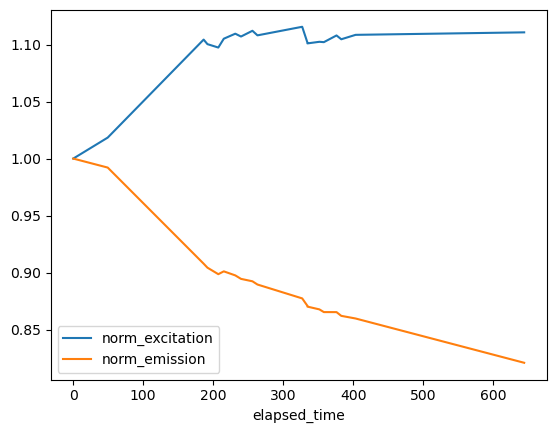

In [450]:
pl_time.plot('elapsed_time',['norm_excitation','norm_emission'])


In [451]:
from scipy.optimize import curve_fit

def stretched_exponential(t, A, tau, beta):
    return A * np.exp(-(t/tau)** beta)

popt, pcov = curve_fit(stretched_exponential,pl_time['elapsed_time'],pl_time['norm_emission'],p0=[1,100,0.5])


In [452]:
#time_range = pl_time['elapsed_time'].max()
time_range = 1000

def get_function_table():
    output_range = [i for i in range(0,round(time_range))]
    output_table = pd.DataFrame({
        'elapsed_time':output_range,
        'function':[stretched_exponential(i,popt[0],popt[1],popt[2]) for i in output_range]})
    return output_table

output_table = get_function_table()
output_table

,elapsed_time,function
0,0,1.008530
1,1,1.004542
2,2,1.002414
3,3,1.000677
4,4,0.999155
...,...,...
995,995,0.759794
996,996,0.759661
997,997,0.759527
998,998,0.759393


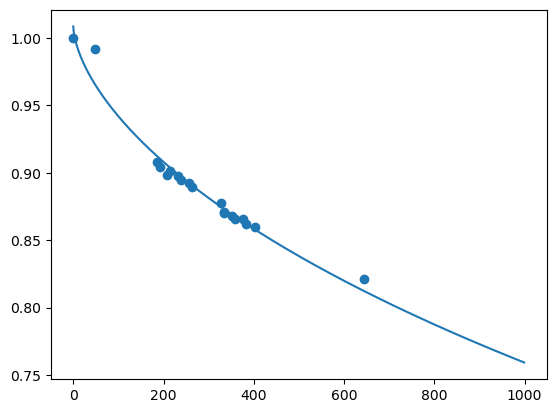

In [453]:
plt.scatter(pl_time['elapsed_time'],pl_time['norm_emission'])
plt.plot(output_table['elapsed_time'],output_table['function'])
plt.show()